# Grid types
In this tutorial, we show how to create different grid types, that might be useful for different grid architectures in DL applications.

In [1]:
import numpy as np
import geoutils.utils.general_utils as gut
import geoutils.utils.spatial_utils as sput
import geoutils.plotting.plots as cplt
import geoutils.utils.time_utils as tu
import geoutils.geodata.base_dataset as bds
import geoutils.grid.grid as grid
from importlib import reload

plot_dir = "/home/strnad/data/plots/tutorials/"


## Fekete Grid

Try to load grid None...

Create Fekete grid with 367 points with 1000 iterations.
Initial configuration not provided. Generating random one ...


Estim 54%|████████████████▏             | 538/1000 [00:28<00:24, 18.70it/s]

convergence reached after 538 iterations!
... Finished


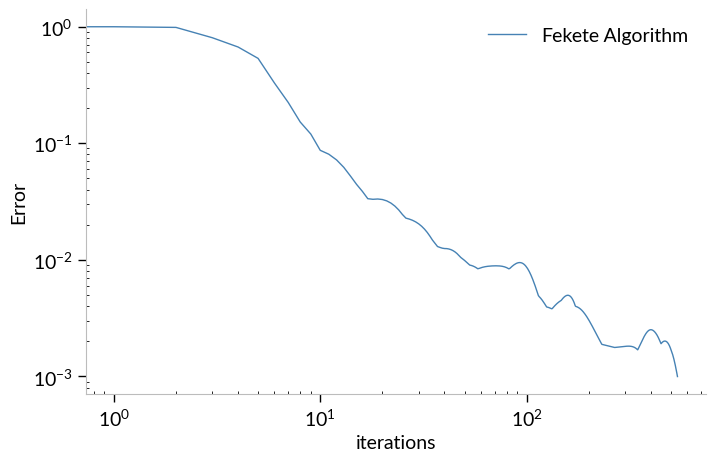

In [2]:
# Test
grid_step = 10
dist_equator = sput.degree2distance_equator(grid_step)
num_points = grid.get_num_points(dist_equator)
# %%
Fek_rand = grid.FeketeGrid(num_points=num_points,
                        pre_proccess_type=None)
grid_type = 'fekete'
sp_grid = f'{grid_type}_{grid_step}.npy'

reload(cplt)
im = cplt.plot_xy(
    x_arr=[np.arange(len(Fek_rand.dq))],
    y_arr=[Fek_rand.dq],
    label_arr=['Fekete Algorithm'],
    xlabel='iterations',
    ylabel=f'Error',
    fig_size=(9, 5),
    log=True,
    ls_arr=['-'],
)

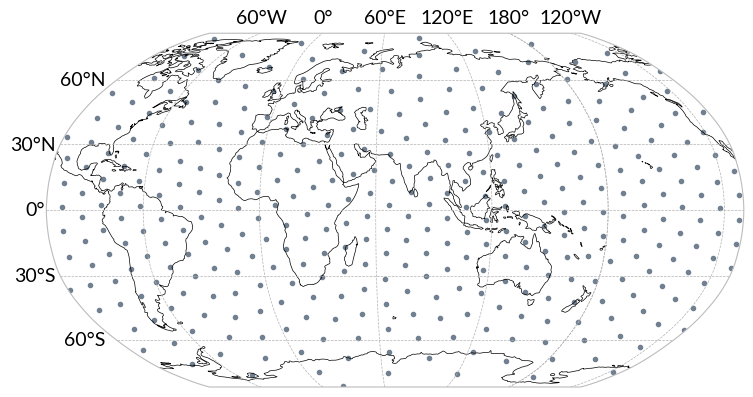

In [3]:
reload(cplt)
lons = Fek_rand.grid['lon']
lats = Fek_rand.grid['lat']

lon_lat_points = gut.zip_2_lists(lons, lats)
# Plot the grid
im = cplt.plot_map(
    lon_lat_points,
    plot_type='points',
    # title='Fekete Grid',
    projection='Robinson',
    figsize=(9, 5),
    central_longitude=70,
    color='slategray',
    size=3,
)
savepath= f'{plot_dir}/fekete_grid_{grid_step}.pdf'
cplt.save_fig(savepath)

Cut grid in range lat: [-20, 60] and lon: [-180, 180]


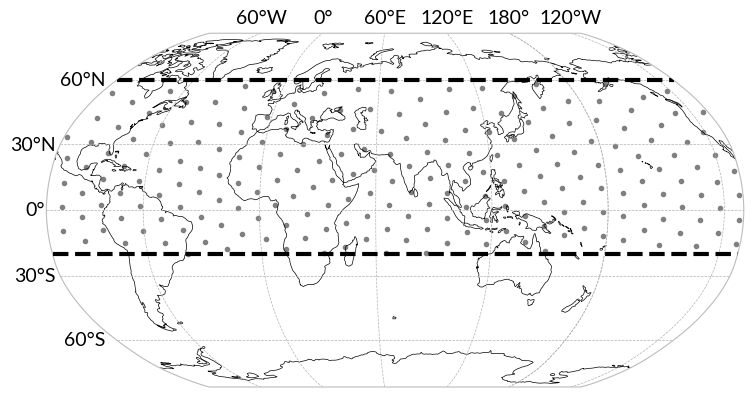

In [4]:
reload(cplt)
# Cut the grid between 20°S and 60°N
cutted_grid = Fek_rand.cut_grid(lat_range=[-20, 60],
                  lon_range=[-180, 180])
lons = cutted_grid['lon']
lats = cutted_grid['lat']
lon_lat_points = gut.zip_2_lists(lons, lats)
# Plot the cutted grid
im = cplt.plot_map(
    lon_lat_points,
    plot_type='points',
    central_longitude=70,
    projection='Robinson',
    figsize=(9, 5),
    color='grey',
    size=3,
)

# Plot a horizontal line at the specified latitude
color='black'
cplt.plot_horizontal_line_at_latitude(ax=im['ax'],
                                      latitude=60, ls='--',
                                      color=color, lw=3, )
cplt.plot_horizontal_line_at_latitude(ax=im['ax'],
                                        latitude=-20, ls='--',
                                        color=color, lw=3)
savepath= f'{plot_dir}/fekete_grid_{grid_step}_cutted.pdf'
cplt.save_fig(savepath)

## Reduced Gaussian Grid

Grid step is the grid step in latitudinal direction!


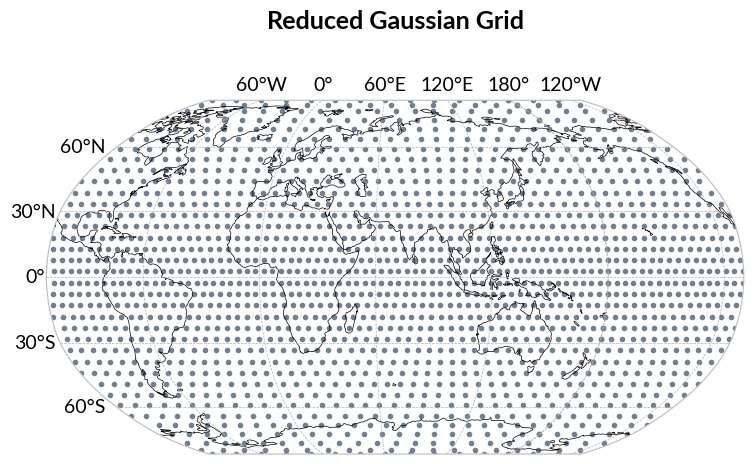

In [15]:
reload(grid)
grid_step = 5

# %%
Red_Gauss_Grid = grid.Reduced_GaussianGrid(
    grid_step=grid_step,)
lon_lat_points = Red_Gauss_Grid.grid['grid']
# Plot the grid
im = cplt.plot_map(
    lon_lat_points,
    plot_type='points',
    title='Reduced Gaussian Grid',
    projection='Robinson',
    figsize=(9, 5),
    central_longitude=70,
    color='slategray',
    size=3,
)
savepath= f'{plot_dir}/Red_Gaussian_grid_{grid_step}.pdf'
cplt.save_fig(savepath)